# week4 授業前課題1 アヤメの分類

## 目的
- 教師あり学習（分類問題）の概観を知る
- scikit-laernを使い分類を行えるようにする
- 手法の簡単な比較をする

## どのように学ぶか
- 定番のデータセットを通じて、分類問題を解く流れやライブラリの使い方を学びます。

## 今回使う手法
- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

## 前提条件
- 特徴量「sepal_length（がく片の長さ）」と「petal_length（花弁の長さ）」の2つだけ使用する
- アヤメの種類を「virgicolor」と「virginica」の2つにする

## 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。<br>
- virgicolorとvirginica
- sepal_lengthとpetal_length
<br>
【深堀り】
選び方は18通り...${}_4 C_2 \times {}_3 C_2 = \frac{4!}{2!(4 - 2)!}\times \frac{3!}{2!(3 - 2)!} = 6\times3 = 18$

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd


In [2]:
iris_data = datasets.load_iris()
input_data = iris_data.data
X = pd.DataFrame(data=input_data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
correct = iris_data.target
y = pd.DataFrame(data=correct, columns=["Species"])
df = pd.concat([X, y], axis=1)

In [3]:
df.drop(columns=["sepal_width", "petal_width"], inplace=True)

In [4]:
df.drop(df.index[df["Species"]==0], inplace=True)

In [5]:
df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
55,5.7,4.5,1
56,6.3,4.7,1
57,4.9,3.3,1
58,6.6,4.6,1
59,5.2,3.9,1


## 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。<br>
その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。<br>

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

散布図

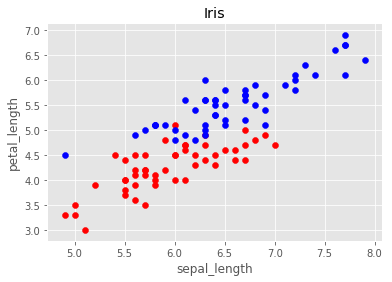

In [6]:
x_1 = df[df.Species==1].iloc[:, 0]   #sepal_lengthでラベル1（virgicolor）
x_2 = df[df.Species==2].iloc[:, 0]   #sepal_lengthでラベル2（virginica）

y_1 = df[df.Species==1].iloc[:, 1]   #petal_lengthでラベル1（virgicolor）
y_2 = df[df.Species==2].iloc[:, 1]   #petal_lengthでラベル2（virgicolor）

# 散布図を描画
plt.title("Iris")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.scatter(x_1, y_1, c="r")
plt.scatter(x_2, y_2, c="b")

箱ひげ図

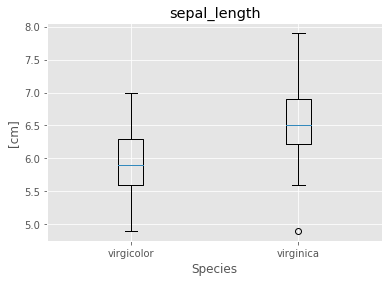

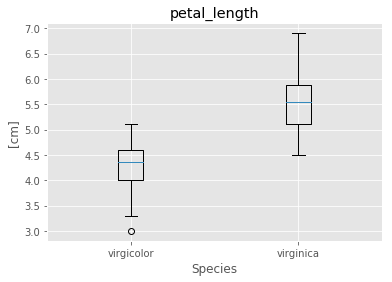

In [7]:
features = ["sepal_length", "petal_length"]
for featur in features:
    plt.boxplot([df[df["Species"]==1][featur], df[df["Species"]==2][featur]] )
    plt.xticks([1, 2], ["virgicolor", "virginica"])
    plt.title(featur)
    plt.ylabel("[cm]")
    plt.xlabel("Species")
    plt.show()

バイオリン図

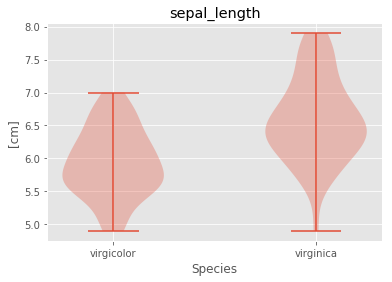

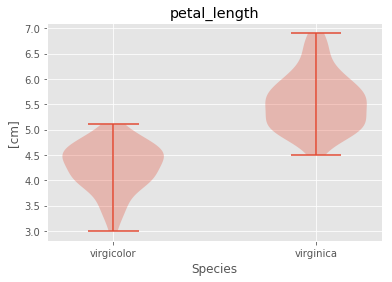

In [8]:
features = ["sepal_length", "petal_length"]
for featur in features:
    plt.violinplot([df[df["Species"]==1][featur], df[df["Species"]==2][featur]] )
    plt.xticks([1, 2], ["virgicolor", "virginica"])
    plt.title(featur)
    plt.ylabel("[cm]")
    plt.xlabel("Species")
    plt.show()

## 【問題3】前処理・訓練データと検証データの分割
NumPyのndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します<br>
訓練データ75%、検証データ25%として分割してください。<br>
scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。<br>

In [9]:
X = df.iloc[:, :2].values
y = df.iloc[:, 2:].values
type(y)

numpy.ndarray

In [10]:
#np.array

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## 【問題4】前処理・標準化
標準化は訓練用(X_train)のデータでfitを行い、訓練用(X_train)、検証用(X_test)双方のデータにtransformを行う

### 【深掘り】標準化とは
データの規格を揃えること。基準化とも言う。どんな単位でも特徴量の平均を0、分散を1にする<br>
例えばテストの科目ごとで平均やばらつきによって、1点の重みが違う物を反映させる役割<br>
$$
\frac{個々のデータ　-　平均}{標準偏差}
$$
訓練用データの平均と標準偏差（fit）を使用して、テストデータのオートスケーリング（センタリング:個々のデータ　-　平均、スケーリング：標準偏差で割る）を行わないと
検証用データのスケーリングがテストデータを変わってしまう

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [13]:
print(X_train.mean())
print(X_train_std.mean())
print(X_test.mean())
print(X_test_std.mean())

5.581333333333333
2.0605739337042904e-15
5.5920000000000005
0.018339264501545483


## 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。<br>
scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。<br>

学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。<br>
パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。<br>
デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

### 【深堀】k近傍法
ユークリッド距離（三平方の定理で求められる）を使って分類する<br>
補足：k近傍法とk平均法は違う。k近傍法は教師あり、k平均法は教師なし<br>
参考：<br>
https://qiita.com/NoriakiOshita/items/698056cb74819624461f

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# 5-nn
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_std, y_train)
y_pred_5nn = neigh.predict(X_test_std)
y_pred_5nn

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1])

In [16]:
# 1-nn
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_std, y_train)
y_pred_1nn = neigh.predict(X_test_std)
y_pred_1nn

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1])

In [17]:
# 3-nn
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_std, y_train)
y_pred_3nn = neigh.predict(X_test_std)
y_pred_3nn

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1])

In [18]:
# 正解と見比べてみる
y_train.T

array([[2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2,
        2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2,
        1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
        1, 2, 1, 2, 2, 1, 2, 1, 1]])

## 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。<br>
2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。<br>
それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。
- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる

In [19]:
# Accuracy(正解率)
from sklearn.metrics import accuracy_score
print("5nnの正解率は{}です".format(accuracy_score(y_test, y_pred_5nn)))
print("3nnの正解率は{}です".format(accuracy_score(y_test, y_pred_3nn)))
print("1nnの正解率は{}です".format(accuracy_score(y_test, y_pred_1nn)))

5nnの正解率は0.88です
3nnの正解率は0.92です
1nnの正解率は0.92です


In [20]:
# Precision(適合率)
from sklearn.metrics import precision_score
print("5nnの適合率は{}です".format(precision_score(y_test, y_pred_5nn)))
print("3nnの適合率は{}です".format(precision_score(y_test, y_pred_3nn)))
print("1nnの適合率は{}です".format(precision_score(y_test, y_pred_1nn)))

5nnの適合率は0.9230769230769231です
3nnの適合率は1.0です
1nnの適合率は0.9285714285714286です


In [21]:
# Recall(再現率)
from sklearn.metrics import recall_score
print("5nnの再現率は{}です".format(recall_score(y_test, y_pred_5nn)))
print("3nnの再現率は{}です".format(recall_score(y_test, y_pred_3nn)))
print("1nnの再現率は{}です".format(recall_score(y_test, y_pred_1nn)))

5nnの再現率は0.8571428571428571です
3nnの再現率は0.8571428571428571です
1nnの再現率は0.9285714285714286です


In [22]:
# F値
from sklearn.metrics import f1_score
print("5nnのF値は{}です".format(f1_score(y_test, y_pred_5nn)))
print("3nnのF値は{}です".format(f1_score(y_test, y_pred_3nn)))
print("1nnのF値は{}です".format(f1_score(y_test, y_pred_1nn)))

5nnのF値は0.888888888888889です
3nnのF値は0.923076923076923です
1nnのF値は0.9285714285714286です


In [23]:
# 混同行列
from sklearn.metrics import confusion_matrix
print("5nnの混同行列は\n{}です".format(confusion_matrix(y_test, y_pred_5nn)))
print("3nnの混同行列は\n{}です".format(confusion_matrix(y_test, y_pred_3nn)))
print("1nnの混同行列は\n{}です".format(confusion_matrix(y_test, y_pred_1nn)))

5nnの混同行列は
[[12  2]
 [ 1 10]]です
3nnの混同行列は
[[12  2]
 [ 0 11]]です
1nnの混同行列は
[[13  1]
 [ 1 10]]です


In [24]:
# 問題８　表作成用
pred_df = pd.DataFrame({"5nn": [accuracy_score(y_test, y_pred_5nn), precision_score(y_test, y_pred_5nn),
                                recall_score(y_test, y_pred_5nn), f1_score(y_test, y_pred_5nn),
                                confusion_matrix(y_test, y_pred_5nn)],
                               "3nn": [accuracy_score(y_test, y_pred_3nn), precision_score(y_test, y_pred_3nn),
                                recall_score(y_test, y_pred_3nn), f1_score(y_test, y_pred_3nn),
                                       confusion_matrix(y_test, y_pred_3nn)],
                               "1nn": [accuracy_score(y_test, y_pred_1nn), precision_score(y_test, y_pred_1nn),
                                recall_score(y_test, y_pred_1nn), f1_score(y_test, y_pred_1nn),
                                       confusion_matrix(y_test, y_pred_1nn)]},
                               index=["正解率", "適合率", "再現率", "F値", "混同行列"])

### 4種類の指標値の意味について簡単に調査して文章でまとめる
- 混同行列とは、各テストデータに対するモデルの予測結果を、真陽性(True Positive)、真陰性(True Negative)、偽陽性(False Positive)、偽陰性(False Negative)の4つの観点で分類 をし、それぞれに当てはまる予測結果の個数をまとめた表<br>
T = True F = False P = Positive N = Negative<br>
[[TP,FP],<br>
[FN, TN]]<br>
[[virgicolorをvirgicolorと判定, virginicaをvirgicolorと誤判定],<br>
[virgicolorをvirginicaと誤判定,virginicaをvirginicaと判定]]<br>

- 正解率は正解数を問題数で割ったもの 正解率 ＝ 正解数　/　問題数<br>
Accuracy = $\frac{TP + TN}{TP + FP + TN + FN}$
- 適合率は、「陽性と予測したもののうち、実際に陽性であった割合」<br>
Precision = $\frac{TP}{TP + FP}$
- 再現率は、「実際に陽性であるもののうち、正しく陽性と予測できたものの割合」<br>
Recall = $\frac{TP}{TP + FN}$
- F値は、「対照的な特徴を持つ適合率と再現率の調和平均」<br>
F-measure = $\frac{2 x Precision x Recall}{Precision + Recall}$


## 【問題7】可視化
Xとyには訓練データまたは検証データを与えます。

In [25]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [26]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)

    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


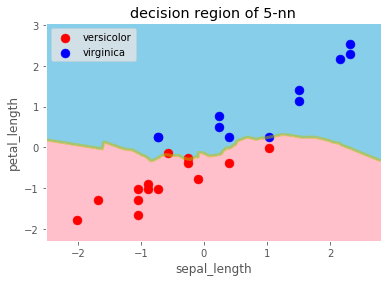

In [27]:
# 5-nn
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_std, y_train)
y_pred_5nn = neigh.predict(X_test_std)
decision_region(X_test_std, y_test.T[0], neigh, title="decision region of 5-nn", xlabel="sepal_length", ylabel="petal_length")

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


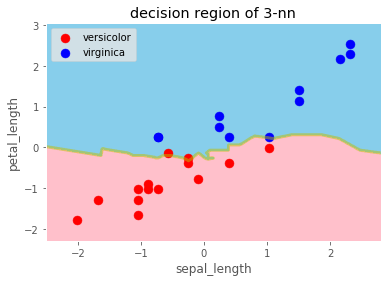

In [28]:
# 3-nn
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_std, y_train)
y_pred_3nn = neigh.predict(X_test_std)
decision_region(X_test_std, y_test.T[0], neigh, title="decision region of 3-nn", xlabel="sepal_length", ylabel="petal_length")

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


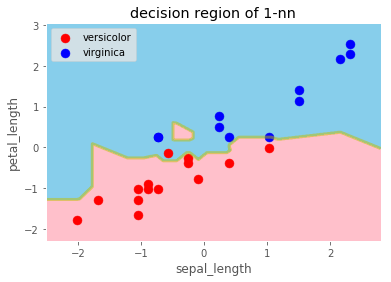

In [29]:
# 1-nn
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_std, y_train)
y_pred_1nn = neigh.predict(X_test_std)
decision_region(X_test_std, y_test.T[0], neigh, title="decision region of 1-nn", xlabel="sepal_length", ylabel="petal_length")

## 【問題8】他の手法の学習
以下の全ての手法について学習(fit)・推定(predict)・評価(4種類の指標値と混同行列)・可視化（散布図）を行ってください。
- 8-1 最近傍法
- 8-2 ロジスティック回帰
- 8-3 SVM
- 8-4 決定木
- 8-5 ランダムフォレスト

指標値を１つの表にまとめてください。<br>
その表と決定領域を利用して結果を簡単に考察してください。<br>
どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。<br>

### 8-1 最近傍法
問題5〜7までで対応済み

### 8-2　ロジスティック回帰

In [30]:
# 学習と推定
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_std, y_train)
y_pred_logistic = clf.predict(X_test_std)
y_pred_logistic

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1])

In [31]:
# 評価
print("ロジスティック回帰の正解率は{}です".format(accuracy_score(y_test, y_pred_logistic)))
print("ロジスティック回帰の適合率は{}です".format(precision_score(y_test, y_pred_logistic)))
print("ロジスティック回帰の再現率は{}です".format(recall_score(y_test, y_pred_logistic)))
print("ロジスティック回帰のF値は{}です".format(f1_score(y_test, y_pred_logistic)))
print("ロジスティック回帰の混同行列は\n{}です".format(confusion_matrix(y_test, y_pred_logistic)))

ロジスティック回帰の正解率は0.96です
ロジスティック回帰の適合率は1.0です
ロジスティック回帰の再現率は0.9285714285714286です
ロジスティック回帰のF値は0.962962962962963です
ロジスティック回帰の混同行列は
[[13  1]
 [ 0 11]]です


In [32]:
# 問題８　表作成用
pred_df = pred_df.assign(ロジスティック回帰=[accuracy_score(y_test, y_pred_logistic),
                                   precision_score(y_test, y_pred_logistic),
                                   recall_score(y_test, y_pred_logistic),
                                   f1_score(y_test, y_pred_logistic),
                                   confusion_matrix(y_test, y_pred_logistic)])

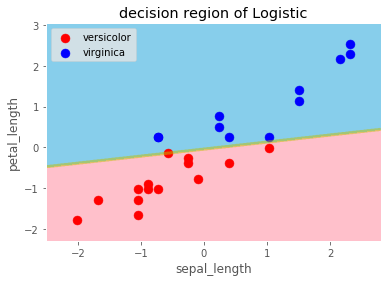

In [33]:
# 可視化
decision_region(X_test_std, y_test.T[0], clf, title="decision region of Logistic", xlabel="sepal_length", ylabel="petal_length")

### 8-3 SVM

In [34]:
# 学習と推定
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# clf = make_pipeline(StandardScaler(), SVC(gamma="auto"))
# clf.fit(X_train_std, y_train)
# y_pred_svm = clf.predict(X_test_std)
# y_pred_svm
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_std, y_train)
y_pred_svm = clf.predict(X_test_std)
y_pred_svm

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1])

In [35]:
# 評価
print("SVMの正解率は{}です".format(accuracy_score(y_test, y_pred_svm)))
print("SVMの適合率は{}です".format(precision_score(y_test, y_pred_svm)))
print("SVMの再現率は{}です".format(recall_score(y_test, y_pred_svm)))
print("SVMのF値は{}です".format(f1_score(y_test, y_pred_svm)))
print("SVMの混同行列は\n{}です".format(confusion_matrix(y_test, y_pred_svm)))

SVMの正解率は0.96です
SVMの適合率は1.0です
SVMの再現率は0.9285714285714286です
SVMのF値は0.962962962962963です
SVMの混同行列は
[[13  1]
 [ 0 11]]です


In [36]:
# 問題８　表作成用
pred_df = pred_df.assign(SVM=[accuracy_score(y_test, y_pred_svm),
                                   precision_score(y_test, y_pred_svm),
                                   recall_score(y_test, y_pred_svm),
                                   f1_score(y_test, y_pred_svm),
                                   confusion_matrix(y_test, y_pred_svm)])

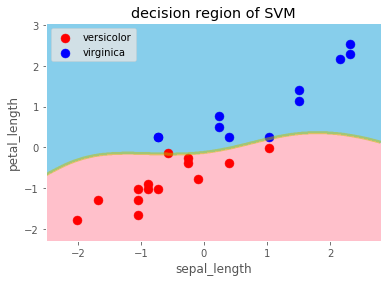

In [37]:
# 可視化
decision_region(X_test_std, y_test.T[0], clf, title="decision region of SVM", xlabel="sepal_length", ylabel="petal_length")

### 8-4 決定木

In [38]:
# 学習と推定
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_std, y_train)
y_predict_DecisionTree = clf.predict(X_test_std)
y_predict_DecisionTree

array([1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1])

In [39]:
# 評価
print("決定木の正解率は{}です".format(accuracy_score(y_test, y_predict_DecisionTree)))
print("決定木の適合率は{}です".format(precision_score(y_test, y_predict_DecisionTree)))
print("決定木の再現率は{}です".format(recall_score(y_test, y_predict_DecisionTree)))
print("決定木のF値は{}です".format(f1_score(y_test, y_predict_DecisionTree)))
print("決定木の混同行列は\n{}です".format(confusion_matrix(y_test, y_predict_DecisionTree)))

決定木の正解率は0.92です
決定木の適合率は0.9285714285714286です
決定木の再現率は0.9285714285714286です
決定木のF値は0.9285714285714286です
決定木の混同行列は
[[13  1]
 [ 1 10]]です


In [40]:
# 問題８　表作成用
pred_df = pred_df.assign(決定木=[accuracy_score(y_test, y_predict_DecisionTree),
                                   precision_score(y_test, y_predict_DecisionTree),
                                   recall_score(y_test, y_predict_DecisionTree),
                                   f1_score(y_test, y_predict_DecisionTree),
                                   confusion_matrix(y_test, y_predict_DecisionTree)])

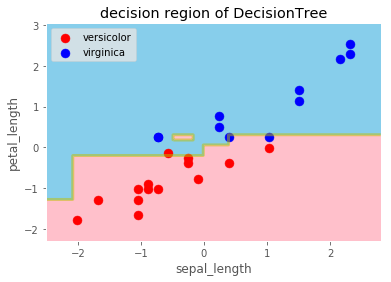

In [41]:
# 可視化
decision_region(X_test_std, y_test.T[0], clf, title="decision region of DecisionTree", xlabel="sepal_length", ylabel="petal_length")

### 8-5 ランダムフォレスト

In [42]:
#  学習と推定
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(X_train_std, y_train)
y_predict_RandomForest = clf.predict(X_test_std)
y_predict_RandomForest

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


array([1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1])

In [43]:
# 評価
print("ランダムフォレストの正解率は{}です".format(accuracy_score(y_test, y_predict_RandomForest)))
print("ランダムフォレストの適合率は{}です".format(precision_score(y_test, y_predict_RandomForest)))
print("ランダムフォレストの再現率は{}です".format(recall_score(y_test, y_predict_RandomForest)))
print("ランダムフォレストのF値は{}です".format(f1_score(y_test, y_predict_RandomForest)))
print("ランダムフォレストの混同行列は\n{}です".format(confusion_matrix(y_test, y_predict_RandomForest)))

ランダムフォレストの正解率は0.92です
ランダムフォレストの適合率は1.0です
ランダムフォレストの再現率は0.8571428571428571です
ランダムフォレストのF値は0.923076923076923です
ランダムフォレストの混同行列は
[[12  2]
 [ 0 11]]です


In [44]:
# 問題８　表作成用
pred_df = pred_df.assign(ランダムフォレスト=[accuracy_score(y_test, y_predict_RandomForest),
                                   precision_score(y_test, y_predict_RandomForest),
                                   recall_score(y_test, y_predict_RandomForest),
                                   f1_score(y_test, y_predict_RandomForest),
                                   confusion_matrix(y_test, y_predict_RandomForest)])

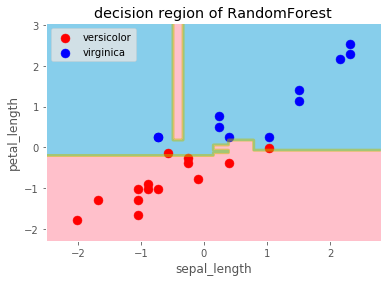

In [45]:
# 可視化
decision_region(X_test_std, y_test.T[0], clf, title="decision region of RandomForest", xlabel="sepal_length", ylabel="petal_length")

### 表にまとめる

In [46]:
pred_df

,5nn,3nn,1nn,ロジスティック回帰,SVM,決定木,ランダムフォレスト
正解率,0.88,0.92,0.92,0.96,0.96,0.92,0.92
適合率,0.923077,1,0.928571,1,1,0.928571,1
再現率,0.857143,0.857143,0.928571,0.928571,0.928571,0.928571,0.857143
F値,0.888889,0.923077,0.928571,0.962963,0.962963,0.928571,0.923077
混同行列,"[[12, 2], [1, 10]]","[[12, 2], [0, 11]]","[[13, 1], [1, 10]]","[[13, 1], [0, 11]]","[[13, 1], [0, 11]]","[[13, 1], [1, 10]]","[[12, 2], [0, 11]]"


### 考察する
学習データと検証データの分類によって、結果が毎回変わるので5回ほど繰り返してみた。<br>
最近傍法の距離が5と3、ロジスティック回帰、SVMでは比較的結果が安定していた。<br>
最近傍法の距離1の散布図をみると、学習データによっては、飛び地のようになってしまっていた<br>
学習データによって精度が変わってしまうので、精度が良かった学習データを使うようにした方が良いのか、そのためにシード値を指定し他方が良いのかもう少し調べる必要がありそう

## 【問題9】（アドバンス課題）標準化の有無の比較

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[2 1 1 2 2 1 1 2 2 2 1 1 2 2 1 1 2 2 1 2 1 1 2 1 1]


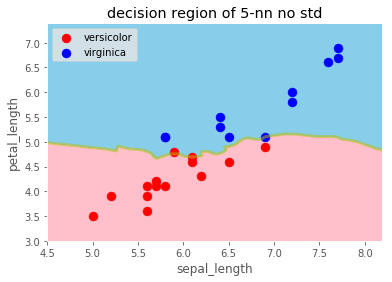

In [47]:
# 5-nn 標準化なし
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred_5nn_ns = neigh.predict(X_test)
print(y_pred_5nn_ns)

# 可視化
decision_region(X_test, y_test.T[0], neigh, title="decision region of 5-nn no std", xlabel="sepal_length", ylabel="petal_length")

In [48]:
# 評価
print("5-nnの標準化なしの正解率は{}です".format(accuracy_score(y_test, y_pred_5nn_ns)))
print("5-nnの標準化なしの適合率は{}です".format(precision_score(y_test, y_pred_5nn_ns)))
print("5-nnの標準化なしの再現率は{}です".format(recall_score(y_test, y_pred_5nn_ns)))
print("5-nnの標準化なしのF値は{}です".format(f1_score(y_test, y_pred_5nn_ns)))
print("5-nnの標準化なしの混同行列は\n{}です".format(confusion_matrix(y_test, y_pred_5nn_ns)))
# 表に追加
pred_df = pred_df.assign(k5nn標準化なし=[accuracy_score(y_test, y_pred_5nn_ns),
                                   precision_score(y_test, y_pred_5nn_ns),
                                   recall_score(y_test, y_pred_5nn_ns),
                                   f1_score(y_test, y_pred_5nn_ns),
                                   confusion_matrix(y_test, y_pred_5nn_ns)])

5-nnの標準化なしの正解率は0.88です
5-nnの標準化なしの適合率は0.9230769230769231です
5-nnの標準化なしの再現率は0.8571428571428571です
5-nnの標準化なしのF値は0.888888888888889です
5-nnの標準化なしの混同行列は
[[12  2]
 [ 1 10]]です


[2 2 1 2 2 1 1 2 2 2 1 1 2 2 1 1 2 2 1 2 1 1 2 1 1]


/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


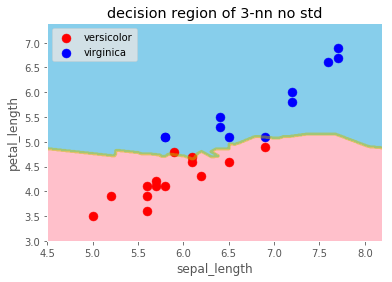

In [49]:
# 3-nn　標準化なし
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred_3nn_ns = neigh.predict(X_test)
print(y_pred_3nn_ns)
# 可視化
decision_region(X_test, y_test.T[0], neigh, title="decision region of 3-nn no std", xlabel="sepal_length", ylabel="petal_length")

In [50]:
# 評価
print("3-nnの標準化なしの正解率は{}です".format(accuracy_score(y_test, y_pred_3nn_ns)))
print("3-nnの標準化なしの適合率は{}です".format(precision_score(y_test, y_pred_3nn_ns)))
print("3-nnの標準化なしの再現率は{}です".format(recall_score(y_test, y_pred_3nn_ns)))
print("3-nnの標準化なしのF値は{}です".format(f1_score(y_test, y_pred_3nn_ns)))
print("3-nnの標準化なしの混同行列は\n{}です".format(confusion_matrix(y_test, y_pred_3nn_ns)))
# 表に追加
pred_df = pred_df.assign(k3nn標準化なし=[accuracy_score(y_test, y_pred_3nn_ns),
                                   precision_score(y_test, y_pred_3nn_ns),
                                   recall_score(y_test, y_pred_3nn_ns),
                                   f1_score(y_test, y_pred_3nn_ns),
                                   confusion_matrix(y_test, y_pred_3nn_ns)])

3-nnの標準化なしの正解率は0.92です
3-nnの標準化なしの適合率は1.0です
3-nnの標準化なしの再現率は0.8571428571428571です
3-nnの標準化なしのF値は0.923076923076923です
3-nnの標準化なしの混同行列は
[[12  2]
 [ 0 11]]です


[1 1 1 2 2 1 1 2 2 2 1 1 2 2 1 1 2 2 1 2 1 1 2 1 1]


/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


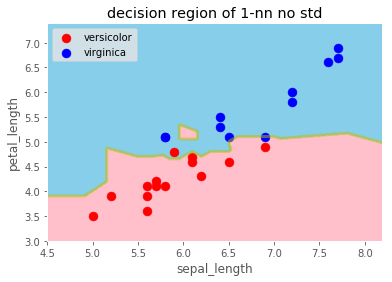

In [51]:
# 1-nn　標準化なし
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
y_pred_1nn_ns = neigh.predict(X_test)
print(y_pred_1nn_ns)
# 可視化
decision_region(X_test, y_test.T[0], neigh, title="decision region of 1-nn no std", xlabel="sepal_length", ylabel="petal_length")

In [52]:
# 評価
print("1-nnの標準化なしの正解率は{}です".format(accuracy_score(y_test, y_pred_1nn_ns)))
print("1-nnの標準化なしの適合率は{}です".format(precision_score(y_test, y_pred_1nn_ns)))
print("1-nnの標準化なしの再現率は{}です".format(recall_score(y_test, y_pred_1nn_ns)))
print("1-nnの標準化なしのF値は{}です".format(f1_score(y_test, y_pred_1nn_ns)))
print("1-nnの標準化なしの混同行列は\n{}です".format(confusion_matrix(y_test, y_pred_1nn_ns)))
# 表に追加
pred_df = pred_df.assign(k1nn標準化なし=[accuracy_score(y_test, y_pred_1nn_ns),
                                   precision_score(y_test, y_pred_1nn_ns),
                                   recall_score(y_test, y_pred_1nn_ns),
                                   f1_score(y_test, y_pred_1nn_ns),
                                   confusion_matrix(y_test, y_pred_1nn_ns)])

1-nnの標準化なしの正解率は0.92です
1-nnの標準化なしの適合率は0.9285714285714286です
1-nnの標準化なしの再現率は0.9285714285714286です
1-nnの標準化なしのF値は0.9285714285714286です
1-nnの標準化なしの混同行列は
[[13  1]
 [ 1 10]]です


In [53]:
# ロジスティック回帰
# 学習と推定
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_logistic_ns = clf.predict(X_test)
y_pred_logistic_ns

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1])

In [54]:
# 評価
print("ロジスティック回帰 標準化なしの正解率は{}です".format(accuracy_score(y_test, y_pred_logistic_ns)))
print("ロジスティック回帰 標準化なしの適合率は{}です".format(precision_score(y_test, y_pred_logistic_ns)))
print("ロジスティック回帰 標準化なしの再現率は{}です".format(recall_score(y_test, y_pred_logistic_ns)))
print("ロジスティック回帰 標準化なしのF値は{}です".format(f1_score(y_test, y_pred_logistic_ns)))
print("ロジスティック回帰 標準化なしの混同行列は\n{}です".format(confusion_matrix(y_test, y_pred_logistic_ns)))

ロジスティック回帰 標準化なしの正解率は0.92です
ロジスティック回帰 標準化なしの適合率は0.9285714285714286です
ロジスティック回帰 標準化なしの再現率は0.9285714285714286です
ロジスティック回帰 標準化なしのF値は0.9285714285714286です
ロジスティック回帰 標準化なしの混同行列は
[[13  1]
 [ 1 10]]です


In [55]:
pred_df = pred_df.assign(ロジスティック回帰標準化なし=[accuracy_score(y_test, y_pred_logistic_ns),
                                   precision_score(y_test, y_pred_logistic_ns),
                                   recall_score(y_test, y_pred_logistic_ns),
                                   f1_score(y_test, y_pred_logistic_ns),
                                   confusion_matrix(y_test, y_pred_logistic_ns)])

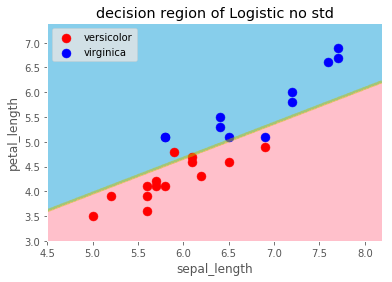

In [56]:
# 可視化
decision_region(X_test, y_test.T[0], clf, title="decision region of Logistic no std", xlabel="sepal_length", ylabel="petal_length")

In [57]:
# SVM
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svm_ns = clf.predict(X_test)
y_pred_svm_ns

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1])

In [58]:
# 評価
print("SVM 標準化なしの正解率は{}です".format(accuracy_score(y_test, y_pred_svm_ns)))
print("SVM 標準化なしの適合率は{}です".format(precision_score(y_test, y_pred_svm_ns)))
print("SVM 標準化なしの再現率は{}です".format(recall_score(y_test, y_pred_svm_ns)))
print("SVM 標準化なしのF値は{}です".format(f1_score(y_test, y_pred_svm_ns)))
print("SVM 標準化なしの混同行列は\n{}です".format(confusion_matrix(y_test, y_pred_svm_ns)))

SVM 標準化なしの正解率は0.96です
SVM 標準化なしの適合率は1.0です
SVM 標準化なしの再現率は0.9285714285714286です
SVM 標準化なしのF値は0.962962962962963です
SVM 標準化なしの混同行列は
[[13  1]
 [ 0 11]]です


In [59]:
pred_df = pred_df.assign(SVM標準化なし=[accuracy_score(y_test, y_pred_svm_ns),
                                   precision_score(y_test, y_pred_svm_ns),
                                   recall_score(y_test, y_pred_svm_ns),
                                   f1_score(y_test, y_pred_svm_ns),
                                   confusion_matrix(y_test, y_pred_svm_ns)])

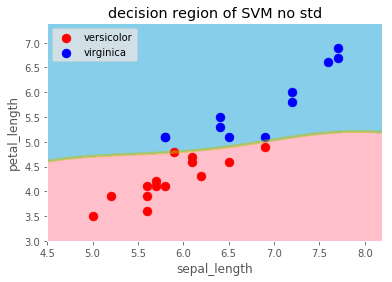

In [60]:
# 可視化
decision_region(X_test, y_test.T[0], clf, title="decision region of SVM no std", xlabel="sepal_length", ylabel="petal_length")

In [61]:
# 決定木
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_predict_DecisionTree_ns = clf.predict(X_test)
y_predict_DecisionTree_ns

array([1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1])

In [62]:
# 評価
print("決定木 標準化なしの正解率は{}です".format(accuracy_score(y_test, y_predict_DecisionTree_ns)))
print("決定木 標準化なしの適合率は{}です".format(precision_score(y_test, y_predict_DecisionTree_ns)))
print("決定木 標準化なしの再現率は{}です".format(recall_score(y_test, y_predict_DecisionTree_ns)))
print("決定木 標準化なしのF値は{}です".format(f1_score(y_test, y_predict_DecisionTree_ns)))
print("決定木 標準化なしの混同行列は\n{}です".format(confusion_matrix(y_test, y_predict_DecisionTree_ns)))

決定木 標準化なしの正解率は0.92です
決定木 標準化なしの適合率は0.9285714285714286です
決定木 標準化なしの再現率は0.9285714285714286です
決定木 標準化なしのF値は0.9285714285714286です
決定木 標準化なしの混同行列は
[[13  1]
 [ 1 10]]です


In [63]:
pred_df = pred_df.assign(決定木標準化なし=[accuracy_score(y_test, y_predict_DecisionTree_ns),
                                   precision_score(y_test, y_predict_DecisionTree_ns),
                                   recall_score(y_test, y_predict_DecisionTree_ns),
                                   f1_score(y_test, y_predict_DecisionTree_ns),
                                   confusion_matrix(y_test, y_predict_DecisionTree_ns)])

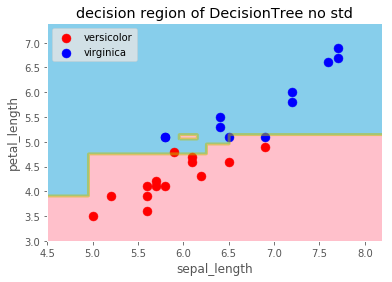

In [64]:
# 可視化
decision_region(X_test, y_test.T[0], clf, title="decision region of DecisionTree no std", xlabel="sepal_length", ylabel="petal_length")

In [65]:
# ランダムフォレスト　
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_predict_RandomForest_ns = clf.predict(X_test)
y_predict_RandomForest_ns

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1])

In [66]:
# 評価
print("ランダムフォレスト 標準化なしの正解率は{}です".format(accuracy_score(y_test, y_predict_RandomForest_ns)))
print("ランダムフォレスト 標準化なしの適合率は{}です".format(precision_score(y_test, y_predict_RandomForest_ns)))
print("ランダムフォレスト 標準化なしの再現率は{}です".format(recall_score(y_test, y_predict_RandomForest_ns)))
print("ランダムフォレスト 標準化なしのF値は{}です".format(f1_score(y_test, y_predict_RandomForest_ns)))
print("ランダムフォレスト 標準化なしの混同行列は\n{}です".format(confusion_matrix(y_test, y_predict_RandomForest_ns)))

ランダムフォレスト 標準化なしの正解率は0.96です
ランダムフォレスト 標準化なしの適合率は1.0です
ランダムフォレスト 標準化なしの再現率は0.9285714285714286です
ランダムフォレスト 標準化なしのF値は0.962962962962963です
ランダムフォレスト 標準化なしの混同行列は
[[13  1]
 [ 0 11]]です


In [67]:
pred_df = pred_df.assign(ランダムフォレスト標準化なし=[accuracy_score(y_test, y_predict_RandomForest_ns),
                                   precision_score(y_test, y_predict_RandomForest_ns),
                                   recall_score(y_test, y_predict_RandomForest_ns),
                                   f1_score(y_test, y_predict_RandomForest_ns),
                                   confusion_matrix(y_test, y_predict_RandomForest_ns)])

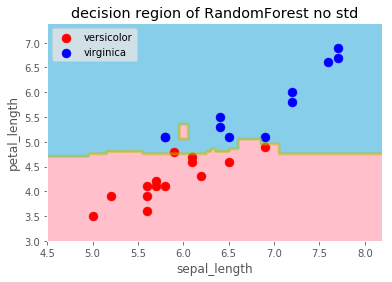

In [68]:
# 可視化
decision_region(X_test, y_test.T[0], clf, title="decision region of RandomForest no std", xlabel="sepal_length", ylabel="petal_length")

In [69]:
pred_df

,5nn,3nn,1nn,ロジスティック回帰,SVM,決定木,ランダムフォレスト,k5nn標準化なし,k3nn標準化なし,k1nn標準化なし,ロジスティック回帰標準化なし,SVM標準化なし,決定木標準化なし,ランダムフォレスト標準化なし
正解率,0.88,0.92,0.92,0.96,0.96,0.92,0.92,0.88,0.92,0.92,0.92,0.96,0.92,0.96
適合率,0.923077,1,0.928571,1,1,0.928571,1,0.923077,1,0.928571,0.928571,1,0.928571,1
再現率,0.857143,0.857143,0.928571,0.928571,0.928571,0.928571,0.857143,0.857143,0.857143,0.928571,0.928571,0.928571,0.928571,0.928571
F値,0.888889,0.923077,0.928571,0.962963,0.962963,0.928571,0.923077,0.888889,0.923077,0.928571,0.928571,0.962963,0.928571,0.962963
混同行列,"[[12, 2], [1, 10]]","[[12, 2], [0, 11]]","[[13, 1], [1, 10]]","[[13, 1], [0, 11]]","[[13, 1], [0, 11]]","[[13, 1], [1, 10]]","[[12, 2], [0, 11]]","[[12, 2], [1, 10]]","[[12, 2], [0, 11]]","[[13, 1], [1, 10]]","[[13, 1], [1, 10]]","[[13, 1], [0, 11]]","[[13, 1], [1, 10]]","[[13, 1], [0, 11]]"


### 考察
標準化を行った方がわずかに精度が上がった。今回のデータは5~8cm、3~7cmとどちらも単位が同じで、数値の幅も近いことから大きな差にはならなかったが、単位は揃えるべきと考える

## 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法

In [70]:
iris_data = datasets.load_iris()
input_data = iris_data.data
X_a = pd.DataFrame(data=input_data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
correct_a = iris_data.target
y_a = pd.DataFrame(data=correct_a, columns=["Species"])
df_a = pd.concat([X_a, y_a], axis=1)
df_a.drop(columns=["sepal_width", "petal_width"], inplace=True)
df_a

,sepal_length,petal_length,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [71]:
# 今までyが縦ベクトルの2次元shape(150,1)になっていたが、下記のようにすると(150,)の1次元になるので散布図描画でそのまま使える
X_a = df_a[["sepal_length","petal_length"]].values
y_a = df_a["Species"].values
y_a


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [72]:
# データの分割
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.25)

In [73]:
# 標準化
scaler_a = StandardScaler()
scaler_a.fit(X_train_a)
X_train_std_a = scaler_a.transform(X_train_a)
X_test_std_a = scaler_a.transform(X_test_a)

In [74]:
# 学習
# 5-nn
neigh_a = KNeighborsClassifier(n_neighbors=5)
neigh_a.fit(X_train_std_a, y_train_a)
y_pred_5nn_a = neigh_a.predict(X_test_std_a)
y_pred_5nn_a

array([1, 2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0])

In [75]:
# 正解と比べてみる
y_test_a

array([1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0])

In [76]:
# 評価
print("5-nnの正解率は{}です".format(accuracy_score(y_test_a, y_pred_5nn_a)))
print("5-nnの適合率は{}です".format(precision_score(y_test_a, y_pred_5nn_a, average="macro")))
print("5-nnの再現率は{}です".format(recall_score(y_test_a, y_pred_5nn_a, average="macro")))
print("5-nnのF値は{}です".format(f1_score(y_test_a, y_pred_5nn_a, average="macro")))

5-nnの正解率は0.9736842105263158です
5-nnの適合率は0.9743589743589745です
5-nnの再現率は0.9761904761904763です
5-nnのF値は0.9743209876543211です


In [77]:
# 表作成
pred_df = pred_df.assign(k5nn_3=[accuracy_score(y_test_a, y_pred_5nn_a),
                                   precision_score(y_test_a, y_pred_5nn_a, average="macro"),
                                   recall_score(y_test_a, y_pred_5nn_a, average="macro"),
                                   f1_score(y_test_a, y_pred_5nn_a, average="macro"),
                                "-"])

In [78]:
def decision_region_3(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=["setosa", 'versicolor', 'virginica']):
    """
    多値分類(今回は3)を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue', "orange"]
    contourf_color = ['pink', 'skyblue', "yellow"]
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='m', linewidths=3, alpha=0.5)

    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()



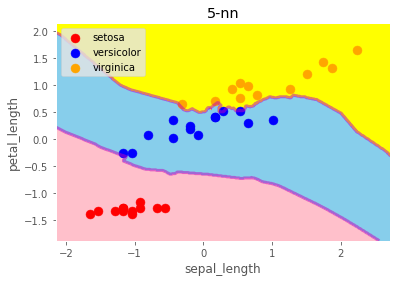

In [79]:
# 可視化
decision_region_3(X_test_std_a, y_test_a, neigh_a, title="5-nn", xlabel="sepal_length", ylabel="petal_length")

In [80]:
# 学習
# 3-nn
neigh_a = KNeighborsClassifier(n_neighbors=3)
neigh_a.fit(X_train_std_a, y_train_a)
y_pred_3nn_a = neigh_a.predict(X_test_std_a)
y_pred_3nn_a

array([1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0])

In [81]:
# 評価
print("3-nnの正解率は{}です".format(accuracy_score(y_test_a, y_pred_3nn_a)))
print("3-nnの適合率は{}です".format(precision_score(y_test_a, y_pred_3nn_a, average="macro")))
print("3-nnの再現率は{}です".format(recall_score(y_test_a, y_pred_3nn_a, average="macro")))
print("3-nnのF値は{}です".format(f1_score(y_test_a, y_pred_3nn_a, average="macro")))

3-nnの正解率は0.9473684210526315です
3-nnの適合率は0.9484126984126985です
3-nnの再現率は0.9484126984126985です
3-nnのF値は0.9484126984126985です


In [82]:
# 表に追加
pred_df = pred_df.assign(k3nn_3=[accuracy_score(y_test_a, y_pred_3nn_a),
                                   precision_score(y_test_a, y_pred_3nn_a, average="macro"),
                                   recall_score(y_test_a, y_pred_3nn_a, average="macro"),
                                   f1_score(y_test_a, y_pred_3nn_a, average="macro"),
                                "-"])

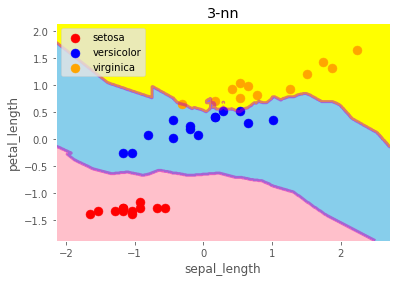

In [83]:
# 可視化
decision_region_3(X_test_std_a, y_test_a, neigh_a, title="3-nn", xlabel="sepal_length", ylabel="petal_length")

In [84]:
# 学習
# 1-nn
neigh_a = KNeighborsClassifier(n_neighbors=1)
neigh_a.fit(X_train_std_a, y_train_a)
y_pred_1nn_a = neigh_a.predict(X_test_std_a)
y_pred_1nn_a

array([1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0])

In [85]:
# 評価
print("1-nnの正解率は{}です".format(accuracy_score(y_test_a, y_pred_1nn_a)))
print("1-nnの適合率は{}です".format(precision_score(y_test_a, y_pred_1nn_a, average="macro")))
print("1-nnの再現率は{}です".format(recall_score(y_test_a, y_pred_1nn_a, average="macro")))
print("1-nnのF値は{}です".format(f1_score(y_test_a, y_pred_1nn_a, average="macro")))

1-nnの正解率は0.9473684210526315です
1-nnの適合率は0.9484126984126985です
1-nnの再現率は0.9484126984126985です
1-nnのF値は0.9484126984126985です


In [86]:
# 表に追加
pred_df = pred_df.assign(k1nn_3=[accuracy_score(y_test_a, y_pred_1nn_a),
                                   precision_score(y_test_a, y_pred_1nn_a, average="macro"),
                                   recall_score(y_test_a, y_pred_1nn_a, average="macro"),
                                   f1_score(y_test_a, y_pred_1nn_a, average="macro"),
                                "-"])

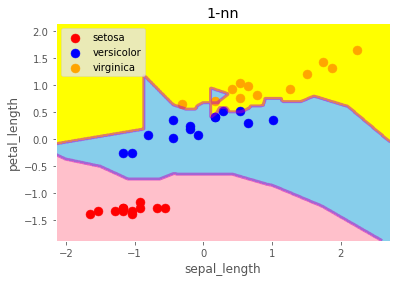

In [87]:
# 可視化
decision_region_3(X_test_std_a, y_test_a, neigh_a, title="1-nn", xlabel="sepal_length", ylabel="petal_length")

In [88]:
# ロジスティック回帰
# 学習
clf = LogisticRegression(random_state=0).fit(X_train_std_a, y_train_a)
y_pred_logistic_a = clf.predict(X_test_std_a)
y_pred_logistic_a

array([2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 2, 0, 0])

In [89]:
# 評価
print("ロジスティック回帰の正解率は{}です".format(accuracy_score(y_test_a, y_pred_logistic_a)))
print("ロジスティック回帰の適合率は{}です".format(precision_score(y_test_a, y_pred_logistic_a, average="macro")))
print("ロジスティック回帰の再現率は{}です".format(recall_score(y_test_a, y_pred_logistic_a, average="macro")))
print("ロジスティック回帰のF値は{}です".format(f1_score(y_test_a, y_pred_logistic_a, average="macro")))

ロジスティック回帰の正解率は0.868421052631579です
ロジスティック回帰の適合率は0.8857142857142858です
ロジスティック回帰の再現率は0.8809523809523809です
ロジスティック回帰のF値は0.8648581692059953です


In [90]:
# 表に追加
pred_df = pred_df.assign(Logistic_3=[accuracy_score(y_test_a, y_pred_logistic_a),
                                   precision_score(y_test_a, y_pred_logistic_a, average="macro"),
                                   recall_score(y_test_a, y_pred_logistic_a, average="macro"),
                                   f1_score(y_test_a, y_pred_logistic_a, average="macro"),
                                "-"])

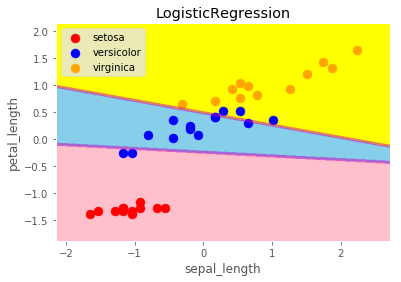

In [91]:
# 可視化
decision_region_3(X_test_std_a, y_test_a, clf, title="LogisticRegression", xlabel="sepal_length", ylabel="petal_length")

In [92]:
# SVM
clf = SVC()
clf.fit(X_train_std_a, y_train_a)
y_pred_svm_a = clf.predict(X_test_std_a)
y_pred_svm_a

array([1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0])

In [93]:
# 評価
print("SVMの正解率は{}です".format(accuracy_score(y_test_a, y_pred_svm_a)))
print("SVMの適合率は{}です".format(precision_score(y_test_a, y_pred_svm_a, average="macro")))
print("SVMの再現率は{}です".format(recall_score(y_test_a, y_pred_svm_a, average="macro")))
print("SVMのF値は{}です".format(f1_score(y_test_a, y_pred_svm_a, average="macro")))

SVMの正解率は1.0です
SVMの適合率は1.0です
SVMの再現率は1.0です
SVMのF値は1.0です


In [94]:
# 表に追加
pred_df = pred_df.assign(SVM_3=[accuracy_score(y_test_a, y_pred_svm_a),
                                   precision_score(y_test_a, y_pred_svm_a, average="macro"),
                                   recall_score(y_test_a, y_pred_svm_a, average="macro"),
                                   f1_score(y_test_a, y_pred_svm_a, average="macro"),
                                "-"])

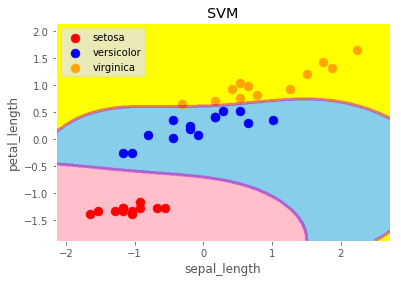

In [95]:
# 可視化
decision_region_3(X_test_std_a, y_test_a, clf, title="SVM", xlabel="sepal_length", ylabel="petal_length")

In [96]:
# 決定木
clf = DecisionTreeClassifier()
clf.fit(X_train_std_a, y_train_a)
y_predict_DecisionTree_a = clf.predict(X_test_std_a)
y_predict_DecisionTree_a

array([1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 0])

In [97]:
# 評価
print("決定木の正解率は{}です".format(accuracy_score(y_test_a, y_predict_DecisionTree_a)))
print("決定木の適合率は{}です".format(precision_score(y_test_a, y_predict_DecisionTree_a, average="macro")))
print("決定木の再現率は{}です".format(recall_score(y_test_a, y_predict_DecisionTree_a, average="macro")))
print("決定木のF値は{}です".format(f1_score(y_test_a, y_predict_DecisionTree_a, average="macro")))

決定木の正解率は0.9473684210526315です
決定木の適合率は0.9484126984126985です
決定木の再現率は0.9484126984126985です
決定木のF値は0.9484126984126985です


In [98]:
# 表に追加
pred_df = pred_df.assign(DTree_3=[accuracy_score(y_test_a, y_predict_DecisionTree_a),
                                   precision_score(y_test_a, y_predict_DecisionTree_a, average="macro"),
                                   recall_score(y_test_a, y_predict_DecisionTree_a, average="macro"),
                                   f1_score(y_test_a, y_predict_DecisionTree_a, average="macro"),
                                "-"])

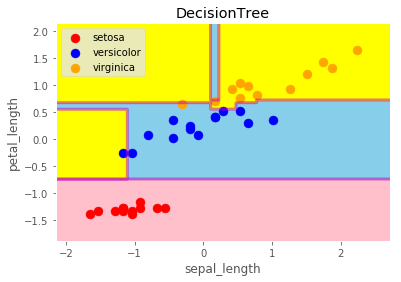

In [99]:
# 可視化
decision_region_3(X_test_std_a, y_test_a, clf, title="DecisionTree", xlabel="sepal_length", ylabel="petal_length")

In [100]:
# ランダムフォレスト
clf = RandomForestClassifier()
clf.fit(X_train_std_a, y_train_a)
y_predict_RandomForest_a = clf.predict(X_test_std_a)
y_predict_RandomForest_a

array([1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0])

In [101]:
# 評価
print("ランダムフォレストの正解率は{}です".format(accuracy_score(y_test_a, y_predict_RandomForest_a)))
print("ランダムフォレストの適合率は{}です".format(precision_score(y_test_a, y_predict_RandomForest_a, average="macro")))
print("ランダムフォレストの再現率は{}です".format(recall_score(y_test_a, y_predict_RandomForest_a, average="macro")))
print("ランダムフォレストのF値は{}です".format(f1_score(y_test_a, y_predict_RandomForest_a, average="macro")))

ランダムフォレストの正解率は0.9736842105263158です
ランダムフォレストの適合率は0.9777777777777779です
ランダムフォレストの再現率は0.9722222222222222です
ランダムフォレストのF値は0.9740129935032483です


In [102]:
# 表に追加
pred_df = pred_df.assign(RandomF_3=[accuracy_score(y_test_a, y_predict_RandomForest_a),
                                   precision_score(y_test_a, y_predict_RandomForest_a, average="macro"),
                                   recall_score(y_test_a, y_predict_RandomForest_a, average="macro"),
                                   f1_score(y_test_a, y_predict_RandomForest_a, average="macro"),
                                "-"])

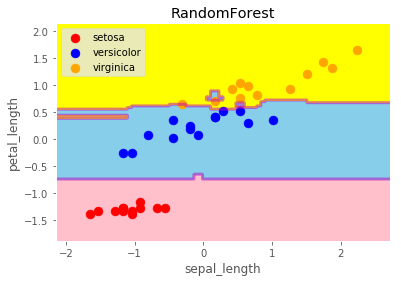

In [103]:
# 可視化
decision_region_3(X_test_std_a, y_test_a, clf, title="RandomForest", xlabel="sepal_length", ylabel="petal_length")

In [104]:
pred_df

,5nn,3nn,1nn,ロジスティック回帰,SVM,決定木,ランダムフォレスト,k5nn標準化なし,k3nn標準化なし,k1nn標準化なし,...,SVM標準化なし,決定木標準化なし,ランダムフォレスト標準化なし,k5nn_3,k3nn_3,k1nn_3,Logistic_3,SVM_3,DTree_3,RandomF_3
正解率,0.88,0.92,0.92,0.96,0.96,0.92,0.92,0.88,0.92,0.92,...,0.96,0.92,0.96,0.973684,0.947368,0.947368,0.868421,1,0.947368,0.973684
適合率,0.923077,1,0.928571,1,1,0.928571,1,0.923077,1,0.928571,...,1,0.928571,1,0.974359,0.948413,0.948413,0.885714,1,0.948413,0.977778
再現率,0.857143,0.857143,0.928571,0.928571,0.928571,0.928571,0.857143,0.857143,0.857143,0.928571,...,0.928571,0.928571,0.928571,0.97619,0.948413,0.948413,0.880952,1,0.948413,0.972222
F値,0.888889,0.923077,0.928571,0.962963,0.962963,0.928571,0.923077,0.888889,0.923077,0.928571,...,0.962963,0.928571,0.962963,0.974321,0.948413,0.948413,0.864858,1,0.948413,0.974013
混同行列,"[[12, 2], [1, 10]]","[[12, 2], [0, 11]]","[[13, 1], [1, 10]]","[[13, 1], [0, 11]]","[[13, 1], [0, 11]]","[[13, 1], [1, 10]]","[[12, 2], [0, 11]]","[[12, 2], [1, 10]]","[[12, 2], [0, 11]]","[[13, 1], [1, 10]]",...,"[[13, 1], [0, 11]]","[[13, 1], [1, 10]]","[[13, 1], [0, 11]]",-,-,-,-,-,-,-


### 考察
複数回学習データを変更して検証した結果、SVMが1番精度が高かった。
しかし、学習データによっては、SVMでも大きく精度が下がることがあった